# Práctica 1 - Regresión

Vamos a trabajar con un conjunto de datos que representa una serie de billetes de renfe. Entre sus parámetros se encuentran:




*   **id**: identificador del billete
*   **company**: empresa
*   **origin**: lugar de salida del tren
*   **destination**: lugar de llegada del tren
*   **departure**: hora de salida del tren
*   **arrival**: hora de llegada del tren
*   **duration**: duración del trayecto
*   **vehicle_type**: tipo de tren
*   **vehicle_class**: clase del pasajero
*   **price**: precio (variable objetivo, a predecir)





In [614]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn import linear_model
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [615]:
test_url = "https://gist.githubusercontent.com/w-dan/a3c63b2aed66a5edd1288c1d3006fc79/raw/9dcc831af941428edad3ef285729e4ef5a63a9fb/renfe-test.csv"
train_url = "https://gist.githubusercontent.com/w-dan/a3c63b2aed66a5edd1288c1d3006fc79/raw/9dcc831af941428edad3ef285729e4ef5a63a9fb/renfe-train.csv"

In [616]:
test = pd.read_csv(test_url)
train = pd.read_csv(train_url)

In [617]:
hehe = train.copy()

In [618]:
train['vehicle_class'].value_counts()
#train.groupby('vehicle_type', as_index= False)['price'].mean()

Turista               2264
Preferente             361
Turista Plus           269
Turista con enlace     102
Name: vehicle_class, dtype: int64

In [619]:
#train.loc[train.vehicle_type == 'MD-LD']

In [620]:
train.vehicle_type.isna().sum()

0

In [621]:
train

,id,company,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,price,fare,seats,meta,insert_date
0,1,renfe,MADRID,BARCELONA,2019-04-18 05:50:00,2019-04-18 08:55:00,3.08,AVE,Preferente,68.95,Promo,NaN,{},2019-04-11 21:49:46
1,2,renfe,MADRID,BARCELONA,2019-04-18 13:25:00,2019-04-18 16:24:00,2.98,AVE-TGV,Turista,107.70,Flexible,NaN,{},2019-04-11 21:49:46
2,3,renfe,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,2.83,AVE,Turista,75.40,Promo,NaN,{},2019-04-11 21:49:46
3,4,renfe,MADRID,BARCELONA,2019-04-18 15:30:00,2019-04-18 18:40:00,3.17,AVE,Preferente,NaN,Promo,NaN,{},2019-04-11 21:49:46
4,5,renfe,MADRID,BARCELONA,2019-04-18 07:00:00,2019-04-18 09:30:00,2.50,AVE,Turista Plus,106.75,Promo,NaN,{},2019-04-11 21:49:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,renfe,MADRID,VALENCIA,2019-06-03 16:05:00,2019-06-03 22:47:00,6.70,REGIONAL,Turista,28.35,Adulto ida,NaN,{},2019-04-11 22:00:09
2996,2997,renfe,MADRID,BARCELONA,2019-04-28 14:30:00,2019-04-28 17:21:00,2.85,AVE,Turista,107.70,Flexible,NaN,{},2019-04-11 22:00:09
2997,2998,renfe,MADRID,BARCELONA,2019-04-28 06:20:00,2019-04-28 09:29:00,3.15,AVE,Turista,49.55,Promo,NaN,{},2019-04-11 22:00:09
2998,2999,renfe,MADRID,BARCELONA,2019-04-28 19:30:00,2019-04-28 22:40:00,3.17,AVE,Turista,85.10,Promo,NaN,{},2019-04-11 22:00:09


In [622]:
import random

def randomize():
  return np.random.choice([1,-1])

In [623]:
print(train['price'].std())

26.022150414543372


In [702]:
hehe = train.copy()

hehe['departure'] = (pd.to_datetime(hehe['departure']))
hehe['arrival'] = (pd.to_datetime(hehe['arrival']))
hehe['insert_date'] = (pd.to_datetime(hehe['insert_date']))

hehe['insert_date_secs'] = hehe['insert_date'].dt.second

hehe['departure_mins'] = hehe['departure'].dt.minute
hehe['departure_h'] = hehe['departure'].dt.hour
hehe['departure_d'] = hehe['departure'].dt.day
hehe['departure_M'] = hehe['departure'].dt.month

hehe['arrival_h'] = hehe['arrival'].dt.hour
hehe['arrival_d'] = hehe['arrival'].dt.day
hehe['arrival_M'] = hehe['arrival'].dt.month

#hehe = hehe.drop(['id'], axis = 1)
hehe = hehe.drop(['seats'], axis = 1)
hehe = hehe.drop(['origin'], axis = 1)
hehe = hehe.drop(['company'], axis = 1)
hehe = hehe.drop(['meta'], axis = 1)
hehe = hehe.drop(['departure'], axis = 1)
hehe = hehe.drop(['arrival'], axis = 1)
hehe = hehe.drop(['insert_date'], axis = 1)
#hehe = hehe.drop(['vehicle_class'], axis = 1)
hehe = hehe.drop(['duration'], axis = 1)

#hehe = hehe.fillna(hehe.price.mean() + randomize()*hehe['price'].std())

hehe.vehicle_class = hehe.vehicle_class.fillna('Turista')
#hehe.price = hehe.price.fillna(hehe.price.median() + 0.1*hehe['price'].std())
hehe = hehe.dropna(axis = 0)

hehe = pd.get_dummies(hehe,prefix=['fare'], columns = ['fare'], drop_first=True)
hehe = pd.get_dummies(hehe,prefix=['destination'], columns = ['destination'], drop_first=True)

hehe[['vehicle_type']] = OrdinalEncoder(categories=[['REGIONAL', 'MD-LD', 'INTERCITY', 'R. EXPRES', 'AVE-LD', 'AV City', 'AVE-MD', 'ALVIA', 'AVE', 'AVE-TGV']]).fit_transform(hehe[['vehicle_type']])
#hehe[['origin']] = OrdinalEncoder().fit_transform(hehe[['origin']])
#hehe[['destination']] = OrdinalEncoder().fit_transform(hehe[['destination']])
#hehe[['fare']] = OrdinalEncoder().fit_transform(hehe[['fare']])
hehe[['vehicle_class']] = OrdinalEncoder(categories=[['Turista con enlace', 'Turista', 'Turista Plus', 'Preferente']]).fit_transform(hehe[['vehicle_class']])

scaler = MinMaxScaler()
#hehe[['duration']] = scaler.fit_transform(hehe[['duration']])
hehe[['insert_date_secs']] = scaler.fit_transform(hehe[['insert_date_secs']])
hehe[['departure_mins']] = scaler.fit_transform(hehe[['departure_mins']])
hehe[['departure_h']] = scaler.fit_transform(hehe[['departure_h']])
hehe[['departure_d']] = scaler.fit_transform(hehe[['departure_d']])
hehe[['departure_M']] = scaler.fit_transform(hehe[['departure_M']])
hehe[['arrival_h']] = scaler.fit_transform(hehe[['arrival_h']])
hehe[['arrival_d']] = scaler.fit_transform(hehe[['arrival_d']])
hehe[['arrival_M']] = scaler.fit_transform(hehe[['arrival_M']])

y = hehe.pop('price')

hehe

,id,vehicle_type,vehicle_class,insert_date_secs,departure_mins,departure_h,departure_d,departure_M,arrival_h,arrival_d,arrival_M,fare_Flexible,fare_Promo,fare_Promo +,destination_SEVILLA,destination_VALENCIA
0,1,8.0,3.0,0.789474,0.909091,0.0000,0.586207,0.0,0.347826,0.586207,0.0,0,1,0,0,0
1,2,9.0,1.0,0.789474,0.454545,0.5000,0.586207,0.0,0.695652,0.586207,0.0,1,0,0,0,0
2,3,8.0,1.0,0.789474,0.545455,0.0625,0.586207,0.0,0.391304,0.586207,0.0,0,1,0,0,0
4,5,8.0,2.0,0.789474,0.000000,0.1250,0.586207,0.0,0.391304,0.586207,0.0,0,1,0,0,0
5,6,8.0,1.0,0.789474,0.545455,0.0625,0.586207,0.0,0.391304,0.586207,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,0.0,1.0,0.140351,0.090909,0.6875,0.068966,1.0,0.956522,0.068966,1.0,0,0,0,0,1
2996,2997,8.0,1.0,0.140351,0.545455,0.5625,0.931034,0.0,0.739130,0.931034,0.0,1,0,0,0,0
2997,2998,8.0,1.0,0.140351,0.363636,0.0625,0.931034,0.0,0.391304,0.931034,0.0,0,1,0,0,0
2998,2999,8.0,1.0,0.140351,0.545455,0.8750,0.931034,0.0,0.956522,0.931034,0.0,0,1,0,0,0


In [703]:
y

0        68.95
1       107.70
2        75.40
4       106.75
5        75.40
         ...  
2995     28.35
2996    107.70
2997     49.55
2998     85.10
2999     68.95
Name: price, Length: 2688, dtype: float64

In [705]:
hehe_test = test.copy()

hehe_test['departure'] = (pd.to_datetime(hehe_test['departure']))
hehe_test['arrival'] = (pd.to_datetime(hehe_test['arrival']))
hehe_test['insert_date'] = (pd.to_datetime(hehe_test['insert_date']))

hehe_test['insert_date_secs'] = hehe_test['insert_date'].dt.second

hehe_test['departure_mins'] = hehe_test['departure'].dt.minute
hehe_test['departure_h'] = hehe_test['departure'].dt.hour
hehe_test['departure_d'] = hehe_test['departure'].dt.day
hehe_test['departure_M'] = hehe_test['departure'].dt.month

hehe_test['arrival_h'] = hehe_test['arrival'].dt.hour
hehe_test['arrival_d'] = hehe_test['arrival'].dt.day
hehe_test['arrival_M'] = hehe_test['arrival'].dt.month

#hehe_test = hehe_test.drop(['id'], axis = 1)
#hehe_test = hehe_test.drop(['vehicle_class'], axis = 1)
hehe_test = hehe_test.drop(['origin'], axis = 1)
hehe_test = hehe_test.drop(['company'], axis = 1)
hehe_test = hehe_test.drop(['seats'], axis = 1)
hehe_test = hehe_test.drop(['meta'], axis = 1)
hehe_test = hehe_test.drop(['departure'], axis = 1)
hehe_test = hehe_test.drop(['arrival'], axis = 1)
hehe_test = hehe_test.drop(['insert_date'], axis = 1)
hehe_test = hehe_test.drop(['duration'], axis = 1)

#hehe_test = hehe_test.fillna(hehe_test.price.mean() + randomize()*hehe_test['price'].std())
#hehe_test.price = hehe_test.price.fillna(hehe_test.price.median() + 0.1*hehe_test['price'].std())
hehe_test = hehe_test.dropna(axis = 0)

hehe_test.vehicle_class = hehe_test.vehicle_class.fillna('Turista')

hehe_test = pd.get_dummies(hehe_test,prefix=['fare'], columns = ['fare'], drop_first=True)
hehe_test = pd.get_dummies(hehe_test,prefix=['destination'], columns = ['destination'], drop_first=True)

hehe_test[['vehicle_class']] = OrdinalEncoder(categories=[['Turista con enlace', 'Turista', 'Turista Plus', 'Preferente']]).fit_transform(hehe_test[['vehicle_class']])
hehe_test[['vehicle_type']] = OrdinalEncoder(categories=[['REGIONAL', 'MD-LD', 'INTERCITY', 'R. EXPRES', 'AVE-LD', 'AV City', 'AVE-MD', 'ALVIA', 'AVE', 'AVE-TGV']]).fit_transform(hehe_test[['vehicle_type']])
#hehe_test[['origin']] = OrdinalEncoder().fit_transform(hehe_test[['origin']])
#hehe_test[['destination']] = OrdinalEncoder().fit_transform(hehe_test[['destination']])
#hehe_test[['insert_date']] = OrdinalEncoder().fit_transform(hehe_test[['insert_date']])

scaler = MinMaxScaler()
#hehe_test[['duration']] = scaler.fit_transform(hehe_test[['duration']])
#hehe_test[['insert_date']] = scaler.fit_transform(hehe_test[['insert_date']])
hehe_test[['insert_date_secs']] = scaler.fit_transform(hehe_test[['insert_date_secs']])
hehe_test[['departure_mins']] = scaler.fit_transform(hehe_test[['departure_mins']])
hehe_test[['departure_h']] = scaler.fit_transform(hehe_test[['departure_h']])
hehe_test[['departure_d']] = scaler.fit_transform(hehe_test[['departure_d']])
hehe_test[['departure_M']] = scaler.fit_transform(hehe_test[['departure_M']])
hehe_test[['arrival_h']] = scaler.fit_transform(hehe_test[['arrival_h']])
hehe_test[['arrival_d']] = scaler.fit_transform(hehe_test[['arrival_d']])
hehe_test[['arrival_M']] = scaler.fit_transform(hehe_test[['arrival_M']])

y_test = hehe_test.pop('price')

hehe_test

,id,vehicle_type,vehicle_class,insert_date_secs,departure_mins,departure_h,departure_d,departure_M,arrival_h,arrival_d,arrival_M,fare_Flexible,fare_Promo,fare_Promo +,destination_SEVILLA,destination_VALENCIA
0,3002,8.0,1.0,0.137931,0.545455,0.1875,0.900000,0.0,0.478261,0.900000,0.0,0,1,0,0,0
1,3003,8.0,3.0,0.137931,0.000000,0.9375,0.900000,0.0,0.956522,0.900000,0.0,0,1,0,0,0
2,3004,8.0,2.0,0.137931,0.545455,0.2500,0.900000,0.0,0.521739,0.900000,0.0,0,1,0,0,0
3,3005,0.0,1.0,0.137931,0.381818,0.4375,0.066667,1.0,0.826087,0.066667,1.0,0,0,0,0,1
4,3006,8.0,1.0,0.137931,0.545455,0.3125,0.900000,0.0,0.565217,0.900000,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,4992,8.0,1.0,0.448276,0.545455,0.1875,0.366667,0.0,0.478261,0.366667,0.0,0,1,0,0,0
1993,4995,9.0,1.0,0.448276,0.454545,0.5000,0.366667,0.0,0.695652,0.366667,0.0,1,0,0,0,0
1994,4996,8.0,1.0,0.448276,0.545455,0.3125,0.366667,0.0,0.565217,0.366667,0.0,1,0,0,0,0
1995,4997,8.0,1.0,0.448276,0.545455,0.6875,0.366667,0.0,0.826087,0.366667,0.0,1,0,0,0,0


In [706]:
reg = linear_model.LinearRegression()
reg.fit(hehe, y)
reg.coef_

array([-7.03468953e-04,  1.34455717e+00,  1.05583801e+01,  5.78204345e-02,
       -6.43305278e+00,  4.84203009e+01,  1.89534108e+03, -3.11341856e+00,
       -6.53144720e+01, -1.89599570e+03, -3.11341856e+00,  2.42987430e+01,
       -7.22588394e+00,  1.60388164e+01, -3.11569335e+01, -3.58497026e+01])

In [707]:
y_pred = reg.predict(hehe_test)

In [708]:
pd.DataFrame(y_pred)

,0
0,74.393735
1,104.096599
2,85.137218
3,19.769715
4,74.763940
...,...
1809,73.360912
1810,107.745354
1811,105.255743
1812,106.374095


In [709]:
y_test

0        75.40
1       115.65
2        90.50
3        28.35
4        85.10
         ...  
1990     85.10
1993    107.70
1994    107.70
1995    107.70
1996    107.70
Name: price, Length: 1814, dtype: float64

In [710]:
a = abs(y_pred - np.array(y_test))
#list(a)

In [711]:
np.mean(a)

8.914955427812279

In [712]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8052316999930134

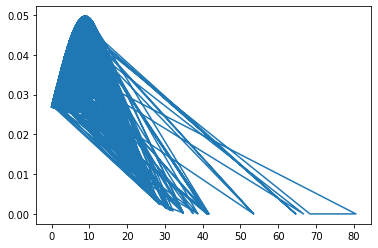

In [713]:
from scipy.stats import norm

mean = np.mean(a)
sd = np.std(a)

plt.plot(a, norm.pdf(a, mean, sd))
plt.show()

In [714]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred, squared=False))

8.914955427812279
143.84623269308733
11.993591317578206


In [755]:
hehe_test['id']

0       3002
1       3003
2       3004
3       3005
4       3006
        ... 
1990    4992
1993    4995
1994    4996
1995    4997
1996    4998
Name: id, Length: 1814, dtype: int64

In [760]:
y_price = pd.DataFrame()
y_price['id'] = hehe_test['id']
y_price['price'] = y_pred
y_price

,id,price
0,3002,74.393735
1,3003,104.096599
2,3004,85.137218
3,3005,19.769715
4,3006,74.763940
...,...,...
1990,4992,73.360912
1993,4995,107.745354
1994,4996,105.255743
1995,4997,106.374095


In [796]:
predictions = pd.DataFrame(test['id'], columns=['id'])
predictions =  pd.merge(predictions, y_price, on= 'id', how='outer')
predictions = predictions.price.fillna(predictions.price.median() + predictions.price.std()*0.1)
predictions = pd.DataFrame(predictions)
predictions.insert(0, 'id', test['id'])
predictions

,id,price
0,3002,74.393735
1,3003,104.096599
2,3004,85.137218
3,3005,19.769715
4,3006,74.763940
...,...,...
1994,4996,105.255743
1995,4997,106.374095
1996,4998,105.440845
1997,4999,46.715139


In [798]:
predictions.to_csv('Resultao.csv', index= False)